To begin, we will generate data. By generating data, we are able to set the underlying distribution and
investigate the utility of the machine learning methods for this lab.

In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:

## generate training data
x1 = np.random.multivariate_normal(mean = [1, 1], cov = [[1,0],[0,1]], size = 100)
x2 = np.random.multivariate_normal(mean = [3, 1], cov = [[1,0],[0,1]], size = 100)
x3 = np.random.multivariate_normal(mean = [2, 2], cov = [[1,0],[0,1]], size = 100)
X = np.vstack([x1, x2, x3])
y = np.concatenate([np.repeat(0,200), np.repeat(1,100)])

x1.shape



(100, 2)

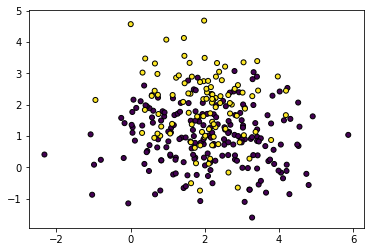

In [4]:

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [5]:
## generate testing data, using the same distribution as the training data
x1 = np.random.multivariate_normal(mean = [1, 1], cov = [[1,0],[0,1]], size = 100)
x2 = np.random.multivariate_normal(mean = [3, 1], cov = [[1,0],[0,1]], size = 100)
x3 = np.random.multivariate_normal(mean = [2, 2], cov = [[1,0],[0,1]], size = 100)
Xtest = np.vstack([x1, x2, x3])
ytest = np.concatenate([np.repeat(0,200), np.repeat(1,100)])

In [6]:
Xtest.shape
#ytest.shape

(300, 2)

# Training, Testing, Regularisation and Hyper-parameters

In [7]:
from sklearn import svm

In [8]:
m = svm.SVC(kernel='poly', C=1, degree = 1, coef0 = 1)
m.fit(X, y)

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
m.score(X, y) # training accuracy


0.7533333333333333

In [10]:
m.score(Xtest, ytest) # test accuracy

0.74

In [11]:
arr_training = []
arr_testing = []
for i in range(1, 6):
    #print(i)
    m = svm.SVC(kernel='poly', C=i, degree = i, coef0 = i)
    m.fit(X, y)
    score_training = m.score(X, y)
    score_testing  = m.score(Xtest, ytest) 
    arr_training.append([i,score_training])
    arr_testing.append([i,score_testing])
  

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

In [13]:
arr_training

[[1, 0.7533333333333333],
 [2, 0.77],
 [3, 0.74],
 [4, 0.7466666666666667],
 [5, 0.77]]

In [15]:
arr_testing[:][0:]

[[1, 0.74],
 [2, 0.7533333333333333],
 [3, 0.7466666666666667],
 [4, 0.7466666666666667],
 [5, 0.7566666666666667]]

In [16]:
def trainAccuracy(C = 1):
    m = svm.SVC(kernel='poly', C=C, degree = 2, coef0 = 1)
    m.fit(X, y)
    return(m.score(X, y))

In [17]:
def testAccuracy(C = 1):
    m = svm.SVC(kernel='poly', C=C, degree = 2, coef0 = 1)
    m.fit(X, y)
    return(m.score(Xtest, ytest))

In [18]:
#The create a vector containing the set of values of to be examined.
Cset = 2.0**np.arange(-5,5)

In [19]:
Cset

array([ 0.03125,  0.0625 ,  0.125  ,  0.25   ,  0.5    ,  1.     ,
        2.     ,  4.     ,  8.     , 16.     ])

In [20]:
trainAcc = np.empty(0)
testAcc  = np.empty(0)


In [21]:
#1. compute the accuracy for each C in Cset and store them in trainAcc and testAcc.
for C in Cset:
    print(C)
    trainAcc = np.append(trainAcc,trainAccuracy(C))
    testAcc  = np.append(testAcc,testAccuracy(C))

0.03125
0.0625
0.125
0.25
0.5
1.0
2.0
4.0
8.0


C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

16.0


C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


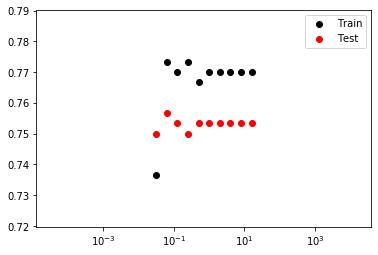

In [22]:
## view the change in train and test error with respect to C
plt.xscale('log')
plt.scatter(Cset, trainAcc, c = 'k', label = "Train")
plt.scatter(Cset, testAcc, c = 'r', label = "Test")
plt.legend()
plt.show()

In [24]:
testAcc

array([0.75      , 0.75666667, 0.75333333, 0.75      , 0.75333333,
       0.75333333, 0.75333333, 0.75333333, 0.75333333, 0.75333333])

# Cross Validation

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
## compute the set of CV splits, here we set the number of partitions to 10
kf = KFold(n_splits=10)

In [27]:
## compute the accuracy for each CV split
m = svm.SVC(kernel='poly', C=1, degree = 1, coef0 = 1)
score = cross_val_score(m, X, y, cv=kf)

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

In [28]:
## compute the mean accuracy over all CV splits
cvScore = score.mean()
print(cvScore)

0.6100000000000001


In [29]:
## compute the test accuracy
m.fit(X, y)
m.score(Xtest, ytest)

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.74

In [30]:
def cvAccuracy(C = 1):
    kf = KFold(n_splits=10)
    m = svm.SVC(kernel='poly', C=C, degree = 2, coef0 = 1)
    score = cross_val_score(m, X, y, cv=kf)
    cvScore = score.mean()
    return(cvScore)

In [31]:
cvTrainAcc = [cvAccuracy(C = C) for C in Cset]

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
## set the search to examine gamma from 2^-5 to 2^4 and C from 2^-5 to 2^4
parameterSet = [{'kernel': ['poly'], 'degree': np.arange(1,5), 'coef0' : [1], 'C': 2.0**np.arange(-5,5)}]
m = svm.SVC()
gsm = GridSearchCV(m, parameterSet, cv=5)
gsm.fit(X, y)

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpos

C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Fabio\Anaconda3\envs\openpose\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([ 0.03125,  0.0625 ,  0.125  ,  0.25   ,  0.5    ,  1.     ,
        2.     ,  4.     ,  8.     , 16.     ]),
                          'coef0': [1], 'degree': array([1, 2, 3, 4]),
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
gsm.best_params_

{'C': 1.0, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}

In [35]:
means = gsm.cv_results_['mean_test_score']
stds = gsm.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

0.687 (+/-0.033) for {'C': 0.03125, 'coef0': 1, 'degree': 1, 'kernel': 'poly'}
0.727 (+/-0.045) for {'C': 0.03125, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
0.730 (+/-0.057) for {'C': 0.03125, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
0.720 (+/-0.057) for {'C': 0.03125, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}
0.703 (+/-0.033) for {'C': 0.0625, 'coef0': 1, 'degree': 1, 'kernel': 'poly'}
0.733 (+/-0.060) for {'C': 0.0625, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
0.730 (+/-0.049) for {'C': 0.0625, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
0.713 (+/-0.049) for {'C': 0.0625, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}
0.720 (+/-0.057) for {'C': 0.125, 'coef0': 1, 'degree': 1, 'kernel': 'poly'}
0.743 (+/-0.065) for {'C': 0.125, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
0.723 (+/-0.072) for {'C': 0.125, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
0.713 (+/-0.057) for {'C': 0.125, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}
0.713 (+/-0.053) for {'C': 0.25, 'coef0': 1, 'degree': 1, 'kerne

# Bayes Error

Compute the probability (we should really say density) from a 2d Normal
distribution

In [39]:
from scipy.stats import multivariate_normal


**1. Compute the probability of each point in X belonging to each class.**

In [40]:
from scipy.stats import multivariate_normal
d1 = multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]])
d2 = multivariate_normal(mean=[3,1], cov=[[1,0],[0,1]])
d3 = multivariate_normal(mean=[2,2], cov=[[1,0],[0,1]])

In [38]:
p1 = d1.pdf(X)
p2 = d2.pdf(X)
p3 = d3.pdf(X)

In [43]:
pxC0 = 0.5*p1 + 0.5*p2
pxC1 = p3

In [44]:
## compute the probabilty of each point being class 1
pY1 = (pxC1/3)/(pxC0*2/3 + pxC1/3)
## compute the probabilty of each point being class 0
pY0 = (pxC0*2/3)/(pxC0*2/3 + pxC1/3)

In [45]:
## the log of the ratio is positive is y = 1 is more likely, or
## negative if y = 0 is more likely.
np.log(pY1/pY0)

array([-0.32472254, -1.02966336, -3.24489401, -0.37862203, -0.54759259,
       -1.63302505, -0.77936656, -2.06855113, -0.63854468, -1.74597947,
       -4.91311601, -2.66810323, -4.91418539, -0.10922984, -0.57363002,
       -1.71879299, -2.05116426, -1.68368938, -0.44187342,  0.98457562,
       -1.19196246, -0.22328347, -1.25343689, -1.68139782, -2.55619706,
       -3.26812884,  0.0132065 , -2.89918421,  0.18477533, -0.88299128,
       -0.7959108 , -1.48799932, -1.23593786,  0.36623821, -0.64843672,
       -0.92877794,  0.75718674, -0.95413493, -1.66001062, -1.41497716,
       -4.23009127, -1.38324454, -0.9490793 , -0.63330798, -1.28214767,
       -3.56477692, -0.91343499, -0.67992942, -0.65041048, -0.43572891,
        0.74312582, -0.73597782, -1.79362966, -1.06959854, -1.63116022,
       -2.50822947, -1.29561611, -2.24729318, -1.68232217, -1.97461461,
       -1.86128825, -1.43952662, -2.04106201, -1.38134757, -3.02720003,
       -1.70144675, -0.94717529, -0.3466444 , -0.65442461, -1.76

In [46]:
## Or we can round the probability of y = 1, to get the more likely class
## since pY0 = 1 - pY1
np.round(pY1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [47]:
## Examine the accuracy to the true class values
np.mean(np.round(pY1) == y)

0.76

* We can see that even if we know the underlying generating distribution of the data, there is still error in our prediction, due to regions of uncertainty in the data space (where the two classes overlap). *